In [93]:
import numpy   as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Input, Conv2DTranspose
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_dir = './3_food_classes/train'
test_dir = './3_food_classes/test'

train_imggen = ImageDataGenerator(rescale=1/255.)
test_imggen = ImageDataGenerator(rescale=1/255.)

train_generator = train_imggen.flow_from_directory(train_dir, target_size=(256,256), batch_size=32, class_mode='categorical')
test_generator = test_imggen.flow_from_directory(test_dir, target_size=(256,256), batch_size=32, class_mode='categorical')

Found 225 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [11]:
img_model = Sequential()

img_model.add( Input(shape=(256,256,3)) )

img_model.add( Conv2D(32, (3,3), activation='leaky_relu') )
img_model.add( MaxPool2D((2,2)) )

img_model.add( Conv2D(64, (3,3), activation='leaky_relu') )
img_model.add( MaxPool2D((2,2)) )

img_model.add( Conv2D(128, (3,3), activation='leaky_relu') )
img_model.add( MaxPool2D( (2,2)) )

img_model.add( Flatten() )

img_model.add( Dense(128, activation='leaky_relu') )
img_model.add( Dense(64, activation='leaky_relu') )
img_model.add( Dense(3, activation='softmax') )

img_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'] )
img_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,427 (56.64 MB)

 Trainable params: 14,847,427 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = img_model.fit(train_generator, epochs=3, batch_size=16, validation_data=test_generator)
history.history

Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 663ms/step - accuracy: 0.7708 - loss: 0.5655 - val_accuracy: 0.4333 - val_loss: 1.4180
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 672ms/step - accuracy: 0.7542 - loss: 0.5425 - val_accuracy: 0.5000 - val_loss: 1.8024
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 689ms/step - accuracy: 0.7064 - loss: 0.5953 - val_accuracy: 0.4000 - val_loss: 1.4212


{'accuracy': [0.7511110901832581, 0.7511110901832581, 0.7599999904632568],
 'loss': [0.5996767282485962, 0.5483417510986328, 0.5240430235862732],
 'val_accuracy': [0.4333333373069763, 0.5, 0.4000000059604645],
 'val_loss': [1.417953372001648, 1.8024064302444458, 1.4212133884429932]}

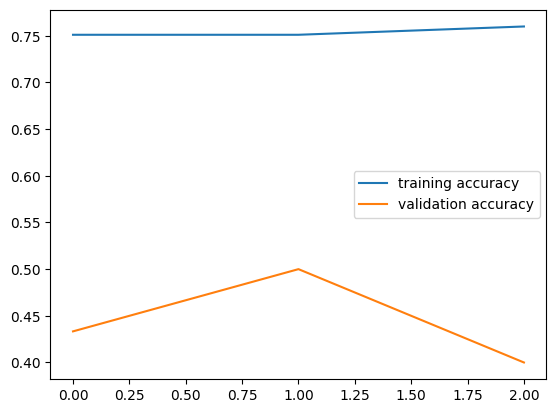

In [18]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

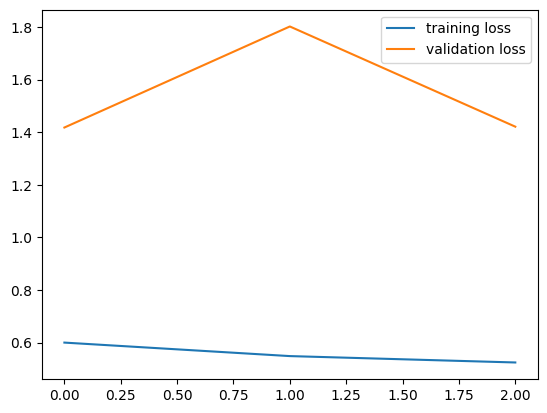

In [19]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

In [22]:
train_datagen_augmented = ImageDataGenerator(rescale=1.0/255.0, rotation_range=40,
                                               width_shift_range=0.2, height_shift_range=0.2,
                                               shear_range=0.2, zoom_range=0.2,
                                               horizontal_flip=True, fill_mode='nearest')

train_augmented = train_datagen_augmented.flow_from_directory(train_dir, target_size=(256, 256),
                                                              class_mode="categorical",
                                                              batch_size=32)

Found 225 images belonging to 3 classes.


In [29]:
imp_model = Sequential()

# Input Layer
imp_model.add( Input(shape=(255,255, 3)) )

# Hidden Layer #1
imp_model.add( Conv2D(32, (3,3), activation='leaky_relu') )
imp_model.add( BatchNormalization() )
imp_model.add( MaxPool2D( (2,2) ))

# Hidden Layer #2
imp_model.add( Conv2D(64, (3,3), activation='leaky_relu') )
imp_model.add( BatchNormalization() )
imp_model.add( MaxPool2D((2,2)))

# Hidden Layer #3
imp_model.add( Conv2D(128, (3,3), activation='leaky_relu') )
imp_model.add( BatchNormalization() )
imp_model.add( MaxPool2D((2,2)))

#Flatten
imp_model.add( Flatten() )

imp_model.add(Dense(256, activation='leaky_relu'))

imp_model.add(Dense(128, activation='leaky_relu'))

imp_model.add(Dense(3, activation='softmax'))

imp_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
imp_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 253, 253, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 253, 253, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 124, 124, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │    29,491,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,618,883 (112.99 MB)

 Trainable params: 29,618,435 (112.99 MB)

 Non-trainable params: 448 (1.75 KB)

In [31]:
callbacks = [ tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
              tf.keras.callbacks.ModelCheckpoint('best_model_saved.keras', save_best_only=True) ]

In [32]:
imp_history = imp_model.fit(train_augmented, epochs=4, batch_size=16, validation_data=test_generator, callbacks=callbacks )
imp_history.history

Epoch 1/4


/Users/satishkumar/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.4537 - loss: 13.7617 - val_accuracy: 0.3333 - val_loss: 3.6988
Epoch 2/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4601 - loss: 9.9009 - val_accuracy: 0.3000 - val_loss: 2.4363
Epoch 3/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.3789 - loss: 13.5715 - val_accuracy: 0.3333 - val_loss: 19.3277
Epoch 4/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.4696 - loss: 14.4313 - val_accuracy: 0.4667 - val_loss: 4.3852


{'accuracy': [0.448888897895813,
  0.4444444477558136,
  0.47111111879348755,
  0.448888897895813],
 'loss': [13.819727897644043,
  9.036643981933594,
  14.938907623291016,
  12.985329627990723],
 'val_accuracy': [0.3333333432674408,
  0.30000001192092896,
  0.3333333432674408,
  0.46666666865348816],
 'val_loss': [3.6988141536712646,
  2.436253547668457,
  19.327739715576172,
  4.385214328765869]}

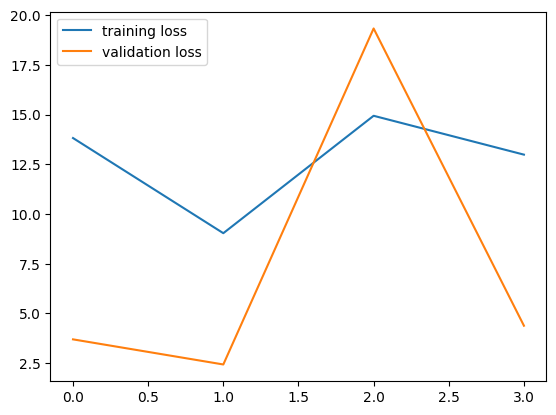

In [37]:
plt.plot(imp_history.history['loss'], label='training loss')
plt.plot(imp_history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

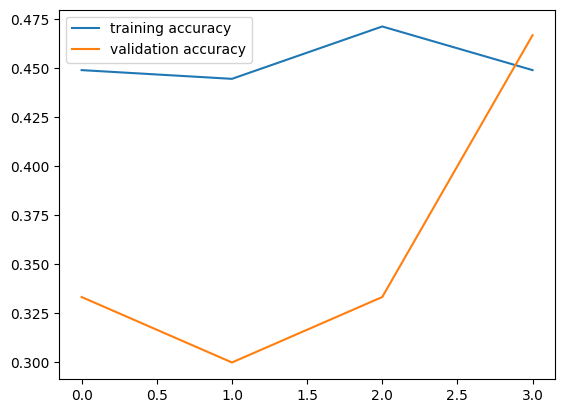

In [41]:
plt.plot(imp_history.history['accuracy'], label='training accuracy')
plt.plot(imp_history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [42]:
imp_lv, imp_acc = imp_model.evaluate(test_generator)
imp_lv, imp_acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.4667 - loss: 4.3852


(4.385214805603027, 0.46666666865348816)

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [47]:
tr_path = './3_food_classes/train'
ts_path = './3_food_classes/test'
tr_imggen = ImageDataGenerator(rescale=1./255.)
ts_imggen = ImageDataGenerator(rescale=1./255.)
tr_img_itr = tr_imggen.flow_from_directory(tr_path, target_size=(256,256), class_mode='categorical')
ts_img_itr = ts_imggen.flow_from_directory(ts_path, target_size=(256,256) ,class_mode='categorical')

Found 225 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [51]:
t1 = [tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
 tf.keras.callbacks.ModelCheckpoint('my_saved_model.keras', save_best_only=True, monitor='val_loss')]
t1

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [54]:
ImageDataGenerator( horizontal_flip=True, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2 )

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1.0/255.0, rotation_range=40,
                                               width_shift_range=0.2, height_shift_range=0.2,
                                               shear_range=0.2, zoom_range=0.2,
                                               horizontal_flip=True, fill_mode='nearest')

# Unet

In [56]:
import cv2
import os

In [82]:
imgdir = './Unet_Dataset/images/'
mskdir = './Unet_Dataset/MASKS_BW/'

images = list()
masks = list()

for i in sorted(os.listdir(imgdir)):
    img_path = os.path.join(imgdir,i)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128,128))
    images.append(img)

for i in sorted(os.listdir(mskdir)):
    img_path = os.path.join(mskdir, i)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128,128))
    masks.append(img)

images = np.array(images)
masks = np.array(masks)

masks = np.expand_dims(masks, axis=-1)

images.shape, masks.shape

((150, 128, 128, 3), (150, 128, 128, 1))

In [84]:
images = images/255.
masks = masks/255.

In [85]:
images[0][0][0]

array([0.14901961, 0.20392157, 0.34117647])

In [86]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(images, masks)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 128, 128, 3), (38, 128, 128, 3), (112, 128, 128, 1), (38, 128, 128, 1))

In [92]:
from tensorflow.keras import layers

In [ ]:
def my_unet_model(input_size=(128,128,3)):

    input_layer = Input(input_size)

    #encoder
    c1 = Conv2D(64, (3,3), activation='leaky_relu', padding='same')(input_layer)
    c1 = Conv2D(64, (3,3), activation='leaky_relu', padding='same')(c1)
    p1 = MaxPool2D((2,2))(c1)

    c2 = Conv2D(128, (3,3), padding='same', activation='leaky_relu')(p1)
    c2 = Conv2D(128, (3,3), activation='leaky_relu', padding='same')(c2)
    p2 = MaxPool2D((2,2))(c2)

    c3 = Conv2D(256, (3,3), activation='leaky_relu', padding='same')(p2)
    c3 = Conv2D(256, (3,3), activation='leaky_relu', padding='same')(c3)
    p3 = MaxPool2D((2,2))(c3)

    c4 = Conv2D(512, (3,3), activation='leaky_relu', padding='same')(p3)
    c4 = Conv2D(512, (3,3), activation='leaky_relu', padding='same')(c4)
    p4 = MaxPool2D((2,2))(c4)

    #bottleneck
    c5 = Conv2D(1024, (3,3), activation='leaky_relu', padding='same')(p4)
    c5 = Conv2D(1024, (3,3), activation='leaky_relu', padding='same')(c5)

    #decoder
    u6 = Conv2DTranspose(512, (2,2), strides=(2,2), padding='same')
    u6 = layers.concatenate([u6, c4])
    c6 = Conv2D(512, (3,3), activation='leaky_relu', padding='same')(u6)
    c6 = Conv2D(512, (3,3), activation='leaky_relu', padding='same')(c6)

    u7 = Conv2DTranspose(256, (2,2), strides=(2,2), padding='same')
    u7 = layers.co]([u7,c3])
    c7 = Conv2D(256, (3,3), activation='leaky_relu', padding='same')(u7)
    c7 = Conv2D(256, (3,3), activation='leaky_relu', padding='same')(c7)

    u8 = Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c7)
    u8 = layers.concatenate([u8,c2])
    c8 = Conv2D(128, (3,3), activation='leaky_relu',)
    

In [91]:
Conv2D??

Init signature: Conv2D(*args, **kwargs)
Source:        
@keras_export(["keras.layers.Conv2D", "keras.layers.Convolution2D"])
class Conv2D(BaseConv):
    """2D convolution layer.

    This layer creates a convolution kernel that is convolved with the layer
    input over a 2D spatial (or temporal) dimension (height and width) to
    produce a tensor of outputs. If `use_bias` is True, a bias vector is created
    and added to the outputs. Finally, if `activation` is not `None`, it is
    applied to the outputs as well.

    Args:
        filters: int, the dimension of the output space (the number of filters
            in the convolution).
        kernel_size: int or tuple/list of 2 integer, specifying the size of the
            convolution window.
        strides: int or tuple/list of 2 integer, specifying the stride length
            of the convolution. `strides > 1` is incompatible with
            `dilation_rate > 1`.
        padding: string, either `"valid"` or `"same"` (case-inse